# Exploratory Data Analysis , Regression, Data Wrangling and Visualization Challenges

We are going to explore some of this movie data. It comes from two
separate sources, boxofficemojo.com and metacritic.com. The data is
stored in files under directories related to these sources. The data
for each movie is stored in its own file.

#### Challenge 1

**First of all, before you do any of these challenges, start a *eda-and-reg* branch in your repository if you haven't done so already.** You will commit the additions you make while solving these challenges to that branch. In the end, you will submit your work by making a pull request.


Start a new ipython notebook in the `project_1` directory. We will read the
data from the boxofficemojo files. The files are in json format, which
is a way to serialize key-value pairs. It looks exactly like how
python shows the contents of a dictionary. For example,

    {"Ryan Gosling": 9,
    "George Clooney": 8,
    "Irmak Sirer": 11}

is a valid json format. (It can be more complex than that, for example
the values might be nested lists, or more dictionaries, etc.)
Import the `os` module to be able to modify/access filesystem
commands, and the `json` module so we can parse these.

    import os
    import json

the relative path to the data directory (since you are already in the
`project_1` directory) is defined as `data/boxofficemojo/` in a Mac (or
linux) system, and as `data\boxofficemojo\` in a Windows
system. However, you don't need to know on what kind of system this
will be run if you use the `os` module:

    DATA_DIR = os.path.join('data', 'boxofficemojo')

will put the correct path in `DATA_DIR`. `os.path.join` basically
combines elements of a path in the correct way for the system.

Let's say we know the filename to a specific file:
`mojo_bladerunner.json`. You can get the path to it with

    target_file_name = 'mojo_bladerunner.json'
    target_file_path = os.path.join(DATA_DIR, target_file_name)

Once a file is opened for reading, the `load` function from the `json`
module will convert this string into a python dictionary:

    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)

Now `movie` is a dictionary. You can look at its contents with `print
movie`, but a more readable pretty-print format is provided by the
`pprint` module:

    from pprint import pprint
    pprint(movie)

will show you the contents in a neatly organized way. You can learn
more about each field in the README file within the data folder.

You initial challenge is to make a single list of movies. Every
single movie in that boxofficemojo directory should be a dictionary in this list. There is a single json file for each movie. Read all this information into a python dictionary, and put the dictionary into the list. When you do this for every movie, you will end up with one big list.
Call this list `movies`. How many movies are there?

Final hint: The `listdir` function from `os`  gives you a list of all
filenames in a given directory.

In [2]:
#record how many movies are there in boxoffice
import os
import json
#define data path
DATA_DIR = os.path.join('c:\Users\wme329\Documents\Data_Science_BootCamp\ct16_cap1_ds5\project_1\data', 'boxofficemojo')
#get all the names in the DATA_DIR path
list_names=os.listdir(DATA_DIR)
#create movie list
movie_list=[]
for movie_item in list_names:
    target_file_path = os.path.join(DATA_DIR, movie_item)
    with open(target_file_path, 'r') as target_file:
         movie = json.load(target_file)
    movie_list.append(movie)
#record how many movies are there in boxoffice
len(movie_list)

3728

#### Challenge 2

What years are the movies from? Are they mostly recent? How far back
do they go? In a new cell, make a list of years in the
dataset. Extract the year field and put the year value for each movie
into a single list. Let's call this list `movie_years`. Now we want to
count the years. What we want is something like a dictionary, with
each year as a key, and the corresponding value is the number of
movies from that year in the dataset.

Hint: Check out the `Counter` class from the `collections` module. You
don't have to use it but it makes things pretty easy.

In [3]:
import collections
#for movie in list extract the years and make it into a list
movie_years=[]
for movie in movie_list:
    movie_years.append(movie["year"])
#count number in each year
movie_year_count=collections.Counter(movie_years)

#### Challenge 3

Start a new cell. Pretty-printing the result of the previous challenge gives you a
decent idea, but let's make a real histogram. Let's make sure ipython
notebook shows the graphs inline and we import the necessary plotting
stuff:

    %matplotlib inline
    import matplotlib.pyplot as plt
	import seaborn as sns

The documentation for plotting a histogram with matplotlib is
[here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist),
but it is basically as easy as doing

    plt.hist(movie_years)

but if you try this now you should get an error. What happened? It
says `NoneType` in the error. If you look in carefully you might see
that some of the years were `None` in `movie_years`. That's because
year data was missing for a handful of movies on boxofficemojo, and
the value is `None`. (How many of them are there?) Clean those out
from your list of years and plot a histogram. Give it a title by
adding a line

    plt.title('Your title goes here")

Note: We imported seaborn but do not seem to use it. However, just the
act of importing seaborn changes the harsh default color scheme and
other visual settings of `matplotlib` and makes the plots made with it
look better.

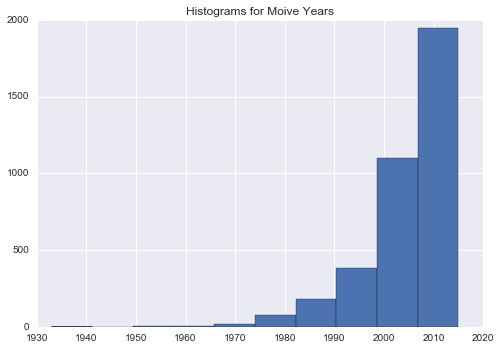

In [4]:
#graphic setting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#clean movie year
movie_year_clean= [movie for movie in movie_years if movie is not None]
#plot histogram
plt.hist(movie_year_clean)
plt.title('Histograms for Moive Years')

#### Challenge 4

Let's look at something else. Make a histogram of the domestic gross
numbers. With a regular histogram, however, you can't really see much,
since low gross movies dominate the dataset. Use a log scale
(logarithm of gross is much easier to read).

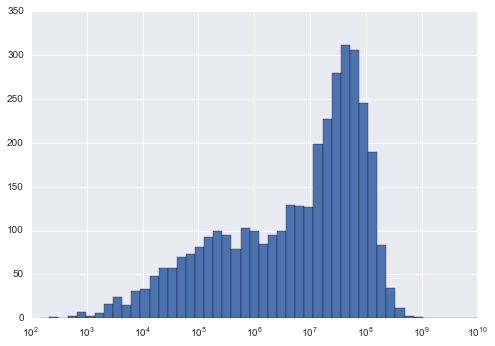

In [5]:
#create list of gross
movie_gross=[]
for movie in movie_list:
    movie_gross.append(movie["domestic_gross"])
#log histogram
import pylab as pl
import numpy as np
pl.hist(movie_gross, bins=np.logspace(2,10))
pl.gca().set_xscale("log")
pl.show()

#### Challenge 5

Make a histogram of title lengths (number of characters in the movie's
title). Add labels to the x and y axes to make it clearer.

In [8]:
#create list of movie title length
movie_title_length=[]
for movie in movie_list:
    movie_title_length.append(len(movie["title"]))

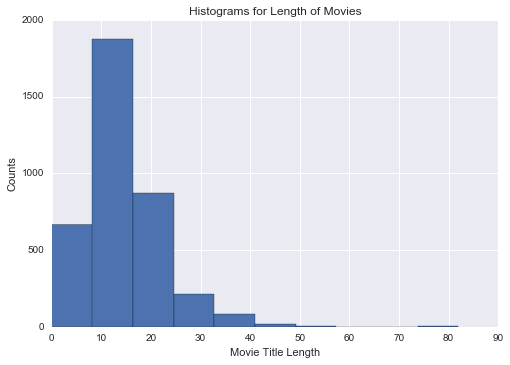

In [11]:
#plot histogram
plt.hist(movie_title_length)
plt.title('Histograms for Length of Movies')
plt.ylabel('Counts')
plt.xlabel('Movie Title Length')

#### Challenge 6

Ok, now let's do this with pandas.

    import pandas as pd

Assuming you called your original list of dictionaries with all the films
`movies`, you can do this:

    movies_df = pd.DataFrame(movies)
    movies_df['year'].hist()

This gives us a histogram of movies.

You can see that we don't have a lot before the 80's. Let's focus on
the last 25 years. You can filter with a boolean expression like this:

    recent_movies = movies_df[movies_df['year']>=1990]

Now `recent_movies` is a dataframe only with movies released
after 1990. Make a histogram of these only, make sure they are all
indeed after 1990.

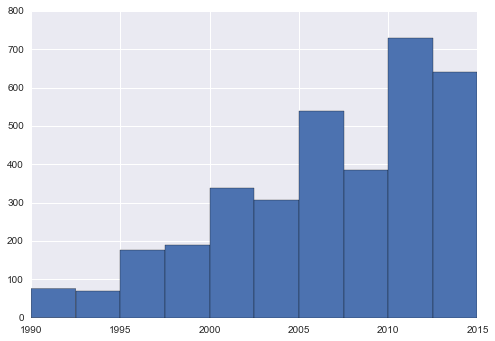

In [13]:
import pandas as pd
movies_df = pd.DataFrame(movie_list)
recent_movies = movies_df[movies_df['year']>=1990]
recent_movies['year'].hist()

#### Challenge 7

Like a histogram, pandas makes it easy to do other types of plots as
well. Make a boxplot of domestic grosses, grouped by year. So, for
each year you should have a boxplot showing the distribution. Do this
for only movies released at or after 1990.

Hint: You can do this with a single, simple line of code.

Once you have it, try to play with its size, limits of y-axis, etc. to
make it big and readable. You wouldn't want things to overlap each
other, or be tiny and squeezed together in a way that would hinder you
from understanding what's going on with grosses over the years.

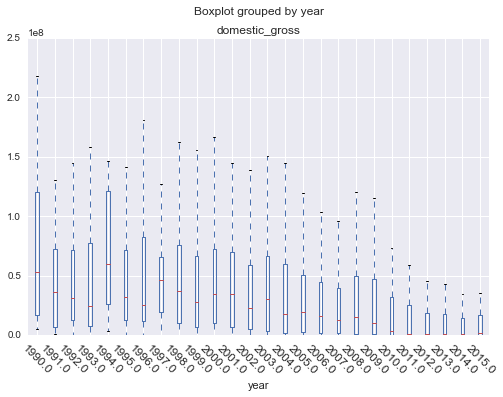

In [23]:
recent_movies = movies_df[movies_df['year']>=1990]
recent_movies.boxplot(column='domestic_gross', by='year',notch=False,widths=0.20,sym='',rot=-45)


#### Challenge 8

Let's take a look at the dataframe. if you do

    movies_df.head()

it will show the first five rows, and ipython notebook will show it in
a nice format. One thing you could notice is that the production
budget values are missing from 2 movies even among these 5. That NaN
(not-a-number) is how pandas treats missing values. They are like
NULLs in a SQL database. Pandas is smart enough to not count them as
real values, keeps them out of the calculation if you need the mean,
etc. If you do

    movies_df.describe()

you get a nice report on every column in the data, allowing you to
inspect and get a feel for each of them. You can see the
count is much lower on production budget, this means a lot of NaNs.

Make a new dataframe that only has movies for which we have budget
information. How many are left?

Hint: You want to look for the `dropna` method.

In [27]:
movies_df.head()
movies_df.describe()
movies_with_budget=movies_df.dropna(subset=['production_budget'], how='any')
#movies_with_budget = movies_df["production_budget" not NAN]

In [28]:
movies_with_budget.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year
count,1.588000e+03,1574.000000,1.574000e+03,1.591000e+03,1576.000000,1.468000e+03,1591.000000
mean,6.411525e+07,7865.506989,1.649038e+07,4.594223e+07,2297.262690,1.423870e+08,2004.597109
std,6.780603e+07,6817.955244,1.711644e+07,4.056849e+07,1071.924067,1.662742e+08,7.015649
min,2.216000e+03,237.000000,2.216000e+03,2.200000e+02,1.000000,2.760000e+03,1953.000000
25%,1.825423e+07,3858.250000,5.319644e+06,1.675000e+07,1658.500000,3.638466e+07,2001.000000
50%,4.387414e+07,6047.500000,1.208024e+07,3.500000e+07,2570.500000,8.898538e+07,2005.000000
75%,8.865223e+07,9570.500000,2.175148e+07,6.500000e+07,3070.250000,1.902124e+08,2010.000000
max,6.586723e+08,93230.000000,1.741446e+08,2.150000e+08,4468.000000,2.186772e+09,2015.000000


#### Challenge 9

Make a scatterplot of the opening weekend take versus domestic gross
for all the movies. Also report on how many movies have both of these
values (how many are you losing since one of these is missing).

## Switching to Regression Before Challenge 10

Ok. Let's do a linear regression. There are two main packages for that
in python. `statsmodels` imitates R in terms of its interface, and
gives a lot of information/diagnostics in a neat table. It is mostly
good for linear and logistic regression, and generalized linear models
in general. `scikit.learn` is python's big machine learning
library. It has a lot of machine learning algorithms (including linear
regression), uses the same interface for all of them (makes it very
easy), and is very actively developed, with more features added very
frequently. It's main disadvantage is that it does not provide a
summary table like `statsmodels`.

Let's start with statsmodels. Make a dataframe called df that has both
the opening weekend take and the domestic gross columns, and drop all
rows with missing data. Call this new dataframe `df`. Now let's fit a model.

    import statsmodels.api as sm

    Y = df.domestic_gross
    X = sm.add_constant(df.opening_weekend_take)

    linmodel = sm.OLS(Y,X).fit()

We are taking the domestic_gross column as our Y variable. X will be a matrix
including all feature columns. But why did we not do  `X =
df.opening_weekend_take`? Well, `statsmodels` does not like to treat
the intercept as a special part of the model. As a design choice, it
wants to treat is just like any other feature that you multiply with a
parameter, however the value for this feature is always one. So, to
have an intercept, you would have to andd a column that has the value
1 for every row. To make it easy to do so, they added this
`add_constant` function, which does exactly that. So now our X is a
matrix with two columns: opening weekend take, and a constant column
that's all 1s.

The fitting is done in one line. Note that Y comes before X. This is
the `statsmodels` design choice (`scikit.learn` does it the other
way).
We now have a linear model trained on
the X and Y data.

Switch to a new cell and execute
 
    linmodel.summary()

This is the table that statsmodels presents with a lot of information
about the model. You are likely to recognize some or most of
these reported metrics. Later in class, we will go over each of them
to make sure there are no gaps left.

And finally, switch to a new cell:

    predicted_gross = linmodel.predict(X)
    plt.scatter(df.opening_weekend_take, df.domestic_gross, color='gray')
    plt.plot(df.opening_weekend_take, predicted_gross)
    plt.title("Opening Weekend Based Model for Domestic Gross")
    plt.xlabel("Opening Weekend Take ($100M)")
    plt.ylabel("Domestic Gross ($100M)")

Here we are first getting the predictions for each movie that we used
in fitting. We are basically asking, what is the expected value that
the model thinks is for this opening_weekend_take?
We then make a scatterplot of all movies in a gray color to pepper the
background showing where observed values fall.
Next, we plot the predictions (which form a line since this is a
single feature model).
Finally we add a title and labels.

You are now ready to continue with the challenges.

#### Challenge 10

Make a scatterplot of actual domestic gross versus predicted domestic
gross. Also plot a line that shows what ideal predictions would
be. Anything above that line is over-prediction, anything below is
underprediction.

#### Challenge 11

Make a scatterplot of predicted gross versus residuals. Also plot a
line that takes the residual value 0 for every gross. We are assuming
that the random part of our model is a normal distribution with the
mean zero. So, ideally, the residuals should be forming a band around
this zero line, and the range shouldn't change. This plot helps you
check that assumption.

#### Challenge 12

We're talking about money (opening weekend and total gross), and
usually, in many real life problems, orders of magnitude of features that spread over such
large scales may be better suited to such models than the values
themselves.

Instead of predicting gross with opening weekend, build a model that
predicts log(gross) with log(opening weekend).

- Print the summary
- Plot log(opening) vs log(gross) (and the fitted line)
- Plot the residuals over log(gross)

(Does it look better or worse? What are the problems?)

#### Challenge 13

Make a predictive model for log(domestic gross) with two features:
log(opening weekend) and square of log(opening weekend). We are
building a quadratic model. Make the residual plot again.

#### Challenge 14

`statsmodels` also allows you to build models using formulas. That can
come in handy if the features and their functional forms start getting
a bit complicated. Build the same quadratic model from the previous
challenge, but do it with a formula. Use

    import statsmodels.formula.api as smf

Then define a formula that looks something like this:

    formula = 'target_column_name ~  feature_1 + feature_2'

where the `target_column_name`, `feature_1` and `feature_2` will be
replaced with column names in your dataframe, and then use the
`ols` function from the imported module which we called `smf` to use
the formula on your data. Make sure the model is exactly the same as
the one from the previous question.

#### Challenge 15

Let's see how doing linear regression works in `scikit.learn`:

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    Y = df['domestic_gross']
    X = df[['opening_weekend_take']]
    model.fit(X, Y)

Pretty straightforward. One thing of note is the double bracket for
X. For Y, `sklearn` expects a single column, one array. However, for X,
it expects a matrix, with one column each for every feature we include
in our model. Here, we are only including one, but it still expects
not a single vector, but a matrix with only one column. When we put a
list of column names within the brackets for a pandas dataframe, it
gives us a new dataframe with all the columns. In the same spirit, we
are here giving it a list, so we can get a Dataframe (a matrix) and
not a Series (a vector) so as not to confuse `sklearn`. Also, note that
the `fit` method is called with X first, then Y. And we don't need to
do anything extra about the intercept.

Ok, `sklearn` does not provide a summary table. If you need to look at
the coefficients and the intercept:

    print model.coef_
    print model.intercept_

If you need to calculate the mean squared error of the model:

    from sklearn.metrics import mean_squared_error
    Y_pred = model.predict(X)
    Y_true = Y
    print mean_squared_error(Y_pred, Y_true

and so on... Scikit.learn has a lot of tools to inform you about the
model but you have to import and use them separately, one by one.

Now, to the challenge. Fit the quadratic log model again, but this
time with `scikit.learn`. Compare the results with what you got from `statsmodels`.

## Switching from iPython Notebook to Standalone Scripts

Save and close your notebook. For the rest of the challenges, we will
use standalone scripts. You can edit them with Atom, and run the file
by running `python scriptname.py` on a terminal (replacing
*scriptname* with your filename, of course)

#### Challenge 16

We will write code to load data from boxofficemojo files again, in a function within a module. This is
pretty much the same process as in Challenge 1, but this time not in
an interactive environment, but in an Atom editor. We will have
reusable code in the end, which is a big win.

* For things like loading, cleaning, and merging data, it’s often best to do these things in a Python module instead of a Jupiter notebook, so that you can reuse the code easily in other modules later. Make a new Python module (aka .py file) called `loaddata.py` in the Project 1 directory.
* Write a [“docstring”](https://en.wikipedia.org/wiki/Docstring#Python) at the top of the module describing what it’s for.
* Under your docstring, add the following code, which gets the full filepath for accessing the directory our data lives in:

```python
# imports
import os

# constants
CURRENT_DIR = os.path.dirname(os.path.realpath(__file__))
DATA_DIR = os.path.abspath(os.path.join(CURRENT_DIR, 'data'))
MOJO_DIR = os.path.join(DATA_DIR, 'boxofficemojo')
```

> os.path.join is used for joining filepaths together. To find out why you should use os.path.join instead of just joining strings together, find a classmate with the opposite OS of you and ask them to print `MOJO_DIR` on their machine.

* Make a main function and use `os.listdir` to see the contents of the `MOJO_DIR` directory. Use `os.path.join` to build a path to one file in that directory, and open it using `open()`.
* Print the contents of the file you opened. Looks kinda like a Python dictionary, right? Double check using Python's `type()` function.
* Turns out those files are actually [JSON](https://en.wikipedia.org/wiki/JSON) format. Import Python's built in `json` library at the top of your file and se the `load` or `loads` function to convert the file to a dictionary.
  > Bonus: `import pprint from pprint` and call `pprint()` on the resulting dictionary to print it in an easier to read format.

* Now that you can load one file, you can load them all. Write a for loop that loops over all the files in the `MOJO_DIR` and appends the dictionaries for each to a list.
* Finishing touch: move this work out of your main function and into a real function called `load_mojo_data()`
  > In a different python file, or in a Jupyter notebook located in the project 1 directory, you can now do something like this:

  ```python
  import loaddata
  import pandas as pd
  movie_dicts = loaddata.load_mojo_data()
  movie_df = pd.DataFrame(movie_dicts)
  ```

  The challenge is to have a working loaddata.py that you can import
  and successfully use in this manner for the following challenges.

# CHOOSE YOUR PATH

The rest of the challenges are in three groups:

- **A.** Modeling with Python
- **B.** Data Wrangling with Python
- **C.** Data Visualization

The order in which you will attack them is up to you. You can start with any of these groups and
switch to any other next, based on your interests. These theree groups
do not depend on each other and can be tackled separately. Remember to
use the python script workflow (as opposed to interactive environment like an
ipython notebook)

## Group A: Modeling with Python

#### Challenge 17
Draw a histogram of the residuals for one of the regression
models. What do their distribution look like? Does it look normally
distributed? (Note: To see matplotlib plots when you run them from a
python script, you need to add the line `plt.show()` to the end. This
opens a new window with the figure in it when you run the python file.)

#### Challenge 18
Build a Domestic Gross model using all the non-categorical features. Include every
available numeric feature. How does your model do? Is it safe to include all
these features?

#### Challenge 19
Create a couple of features yourself. Add them as columns in your
dataframe. Calculate them from other features. Examples: a) Length of
title, b) if it is after 2000 or not (1 if it is, 0 it isn't), number
of theaters opened to (opening take/opening per theater), etc. You make
others. Put them (among with budget and other features of your choice)
in model. See if they look significant. One by one, remove
insignificant features and check the residuals. Any change? What is
left? (Try different combinations to find a better performing
model. Which metric will you use for 'better performance'?)

#### Challenge 20
Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

#### Challenge 21
Build a model for predicting gross with multiple features, including
budget. Plot a scatterplot with x=budget, y=gross, both for actual
values and for predicted values. Predicted values will no longer
neatly fall on a line. Why? What's happening?

## Group B: Data Wrangling with Python

#### Challenge 22

Which director in this dataset has the highest average gross per movie?

#### Challenge 23

Add functionality to loaddata.py that loads the data from files in the
`data/metacritic` folder similarly to how the code we wrote for
boxofficemojo works. Try to reuse as much code as you can, without
copy-pasting it!

#### Challenge 24

BoxofficeMojo data has a couple fields `release_date_limited` and
`release_date_wide` that are strings in a "YYYY-MM-DD" format. Python
has a library called `datetime` for doing useful things with
dates. Write a function using the `datetime` library to convert these
strings into `datetime.date` objects.

#### Challenge 25

Write a function that loads both sources and merges them together,
returning as many movies as possible where data is available from both
sources. Note that these are scraped data from two different websites,
so the fields won't match up in all cases.

## Group C: Data Visualization

#### Challenge 26 
Fit three different regression models to your data (different feature sets). Plot all of them together on top of the real data. Add a legend so we can see which model is which.

#### Challenge 27
For a model that predicts either gross or opening weekend with the budget as the single feature, plot all the movies as points, plot the fitted line of the model, plot your model's best predictions for each movie in the dataset.

#### Challenge 28
Continue from previous challenge. Calculate the mean standard error of your model. To each of your prediction points, add an errorbar the size of the mean square error.

#### Challenge 29
Try drawing the 95% confidence intervals, using `wls_prediction_std` from statsmodels. This page has an example to get you started.

> Bonus tip after finishing: Check out [some of seaborne's pre-configured plotting functions](http://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html) to quickly pull off some nice looking graphs. Also check out the [visual aesthetics tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html#aesthetics-tutorial).